# Visualisation
# Course Work 1 - FFT, Filtering and Spectrograms

# Tutorial Section

In [2]:
# Here, we import all packages we need.

# This is a package for handling and manipulating data.
import pandas as pd

# This is the standard package for plotting.
from matplotlib import pyplot as plt 

# Seaborn is build on matplotlib.
# It is more comfortable to use than pure matplotlib.
import seaborn as sns

# Numpy helps us handling arrays of numbers
import numpy as np

# We use this function to calculate the fft
from numpy.fft import fft, ifft

# This shifts the output of the fft so that zero frequency is at the centre
from numpy.fft import fftshift

# The inverse of fftshift 
from numpy.fft import ifftshift

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

from scipy import signal

from scipy.io import wavfile

import IPython.display as ipd

# Inverse FFT
We have so far only looked at the FFT, but not at its inverse that takes us from the frequency domain back to the time domain.  


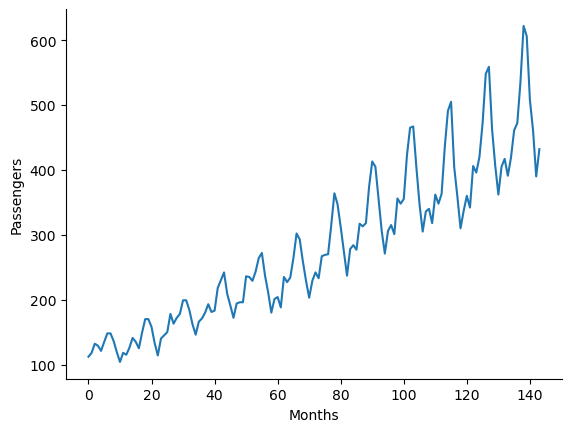

In [4]:
# We will start again with the flight dataset
flights = sns.load_dataset("flights")
passengers = np.array(flights['passengers'])
months = np.arange(passengers.size) 
sns.lineplot(x=months, y=passengers)
plt.xlabel('Months')
plt.ylabel('Passengers')
sns.despine()

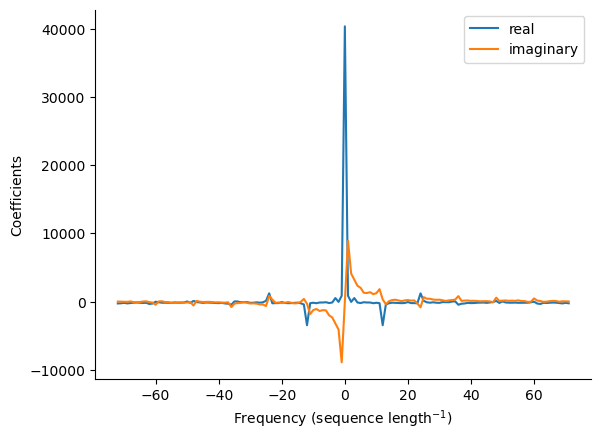

In [5]:
# We apply the FFT
passengersFFT = fftshift(fft(passengers))

# We will use this as x-axis to plot our coefficients against
freqs = np.arange(passengers.size)

# We know that zero frequency is in the centre, so we have to subtract half the length of the array
freqs = freqs - (passengers.size)//2

# Lets plot the results again
sns.lineplot(x=freqs, y=passengersFFT.real, label = 'real')
sns.lineplot(x=freqs, y=passengersFFT.imag, label = 'imaginary')
plt.ylabel('Coefficients')
# The x-axis now corresponds to the frequency as repetitions per sequence length
plt.xlabel('Frequency (sequence length$^{-1}$)')
plt.legend()
sns.despine()
plt.show()


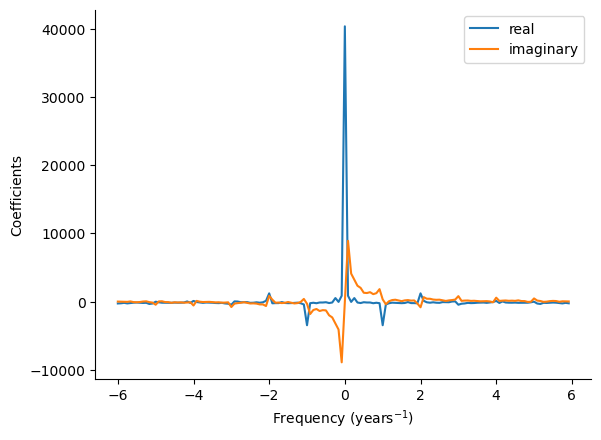

In [7]:
# We have 12 years in the time series.
freqsYears = freqs/12.0

# Lets plot the results again
sns.lineplot(x=freqsYears, y=passengersFFT.real, label = 'real')
sns.lineplot(x=freqsYears, y=passengersFFT.imag, label = 'imaginary')
plt.ylabel('Coefficients')
# The x-axis now correspods to the frequency as repetitions per sequence length
plt.xlabel('Frequency (years$^{-1}$)')
plt.legend()
sns.despine()

Let's now apply the inverse FFT.

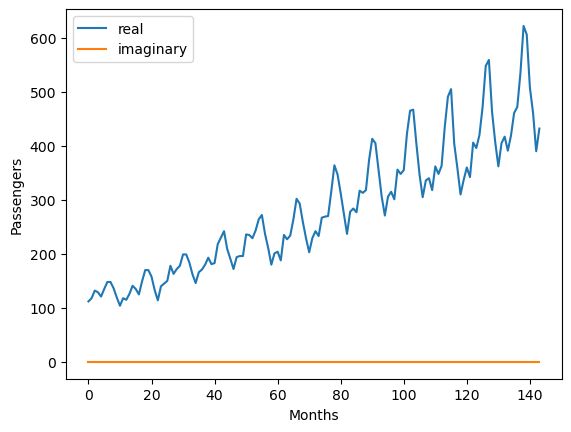

In [9]:
# we have to first apply the inverse fftshift
passengersFFT_shotfBack = ifftshift(passengersFFT)

# now we apply the inverse FFT
passangers_reconstructed = ifft(passengersFFT_shotfBack)

# lets look at the result
# Note that the result is complex.
plt.plot(passangers_reconstructed.real, label ='real')
plt.plot(passangers_reconstructed.imag, label = 'imaginary')
plt.legend()
plt.xlabel('Months')
plt.ylabel('Passengers')
plt.show()

# We only need the real part
# The imaginary part is zero (up to numerical accuracy)
passangers_reconstructed = passangers_reconstructed.real 

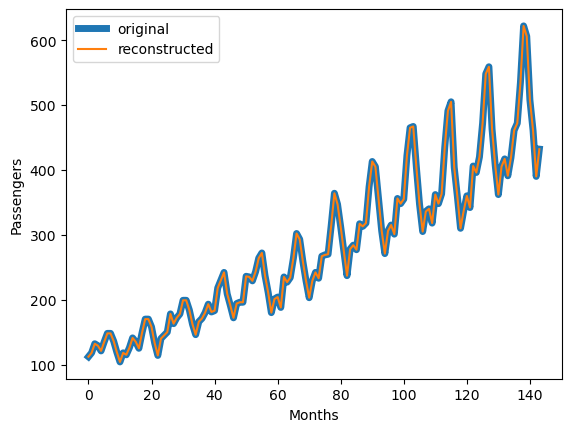

In [10]:
# The our reconstrutcion is identical to the original
plt.plot(flights['passengers'], label ='original', linewidth = 5)
plt.plot(passangers_reconstructed, label = 'reconstructed')
plt.legend()
plt.xlabel('Months')
plt.ylabel('Passengers')
plt.show()

## Filtering in Frequency Space
Here we will apply a filter, before we reconstruct the signal.
This way, we can amplify or remove frequencies.
Before we build a filter, we will make a plot of the spectrum.

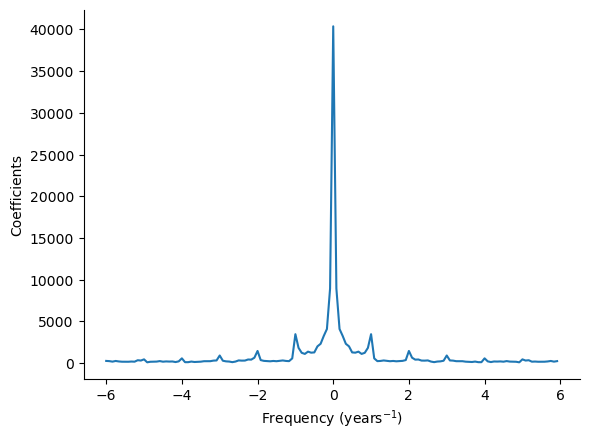

In [14]:
# We apply the FFT
passengersFFT = fftshift(fft(passengers))

# We will use this as x-axis to plot our coefficients against
freqs = np.arange(passengers.size)

# We know that zero frequency is in the centre, so we have to subtract half the length of the array
freqs = freqs - (passengers.size)//2

# We have 12 years in the time series.
freqsYears = freqs/12.0

# Lets plot the results again
sns.lineplot(x = freqsYears, y = np.abs(passengersFFT))
plt.ylabel('Coefficients')
# The x-axis now correspods to the frequency as repetitions per sequence length
plt.xlabel('Frequency (years$^{-1}$)')
sns.despine()

Let's build a filter and plot the filter weights.
## Important: to do this correctly, we have to keep also the negative frequencies and treat them in the same way as the corresponding positive ones.
Thus, the filter has to extend also to the negative part.


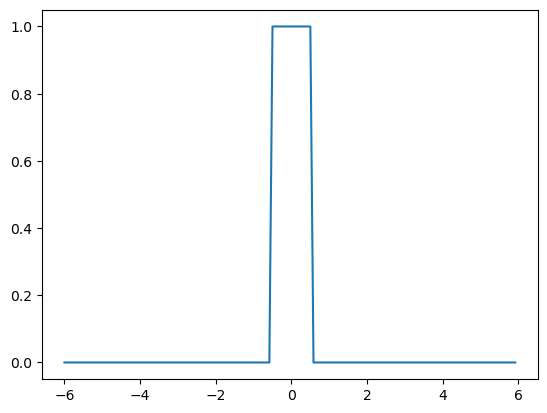

In [19]:
# We are building a brickwall filter that
# will remove all frequencies above 0.5 years^-1 
maxf = 0.5

# We start with an array of ones
weights = np.ones(len(freqsYears))

# This will set all the frequencies we want to keep to 0
weights[(freqsYears>maxf)] = 0.0

# We also have to consider the negative frequencies
weights[(freqsYears<-maxf)] = 0.0

# Let's plot the filter 
plt.plot(freqsYears, weights)

Let's now apply the filter.

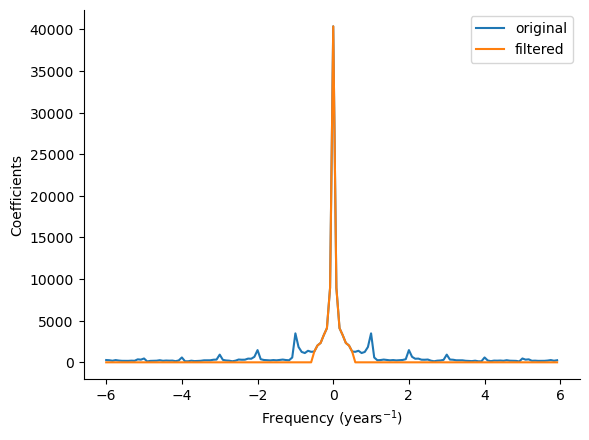

In [23]:
# We multiply the filter
passengersFFT_filtered = passengersFFT*weights

# Let's now look at the resulting spectrum
sns.lineplot(x = freqsYears, y = np.abs(passengersFFT), label = 'original')
sns.lineplot(x = freqsYears, y = np.abs(passengersFFT_filtered), label = 'filtered')
plt.ylabel('Coefficients')
# The x-axis now correspods to the frequency as repetitions per sequence length
plt.xlabel('Frequency (years$^{-1}$)')
sns.despine()
plt.legend()

Let's now look at the reconstructed filtered time series.

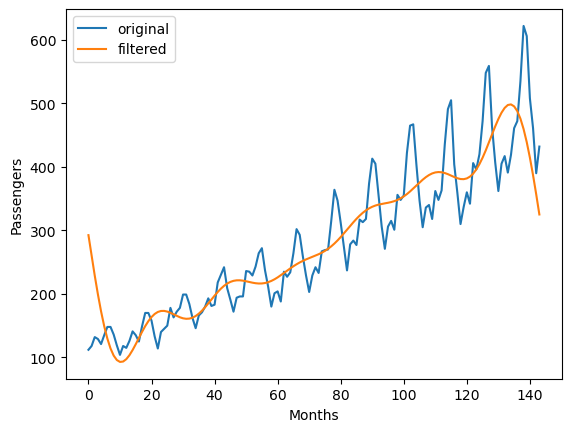

In [26]:
# we have to first apply the inverse fftshift
passengersFFT_shotfBack = ifftshift(passengersFFT_filtered)

# now we apply the inverse FFT
passangers_reconstructed = ifft(passengersFFT_shotfBack)

# We only need the real part
# The imaginary part is zero (up to numerical accuracy)
passangers_reconstructed = passangers_reconstructed.real

# The our reconstrutcion is identical to the original
plt.plot(flights['passengers'], label ='original')
plt.plot(passangers_reconstructed, label = 'filtered')
plt.legend()
plt.xlabel('Months')
plt.ylabel('Passengers')
plt.show()

## Loading Audio Samples


In [29]:
# we load the wav file
sample_rate, data = wavfile.read('./meadowlark_daniel-simion.wav')
# we get the sample rate (number of samples per second)
# and the data itself. It is stereo, i.e., has two channels.
print(sample_rate, data.shape)

# we use only one of the channels
data = data[:,0]

44100 (1792400, 2)


/var/folders/jp/lg_9lz6n3pl67xbgkk8bw9qh0000gn/T/ipykernel_75865/4220590897.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wavfile.read('./meadowlark_daniel-simion.wav')


In [31]:
# Let's plot the time series


In [33]:
# Let's print some stats
number_of_samples = len(data)
length_in_seconds = len(data)/sample_rate
print("number of samples:", number_of_samples)
print("length is seconds:", length_in_seconds)
print("samples per second:", sample_rate)

# We can use this to play the file
ipd.Audio(data, rate = sample_rate ) # load a local WAV file

number of samples: 1792400
length is seconds: 40.64399092970522
samples per second: 44100


Text(0, 0.5, 'signal')

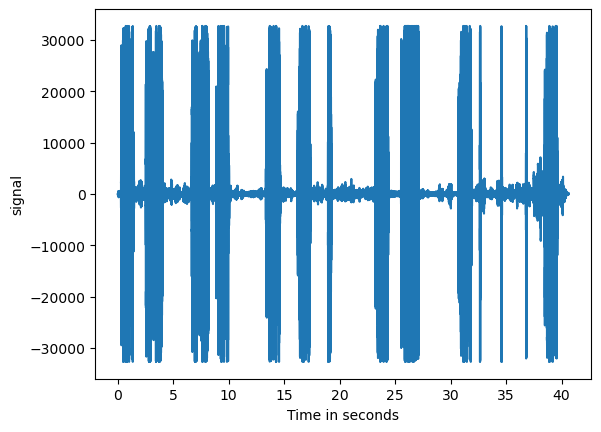

In [35]:
# Let's plot the signal
# To get the x-axis in seconds
x = np.arange(number_of_samples) / sample_rate
plt.plot(x, data)
plt.xlabel('Time in seconds')
plt.ylabel('signal')

## Spectrograms
We can create a spectrogram by using the spectrogram function provided by [scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html).

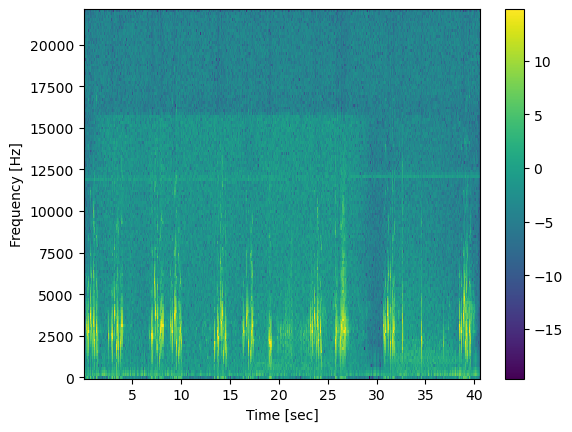

In [37]:
f, t, Sxx = signal.spectrogram(data, sample_rate)

# note that we use the logarithm before visualisation
plt.pcolormesh(t, f, np.log(Sxx))
plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')

plt.colorbar()

plt.show()


Modifying the spectrogram:

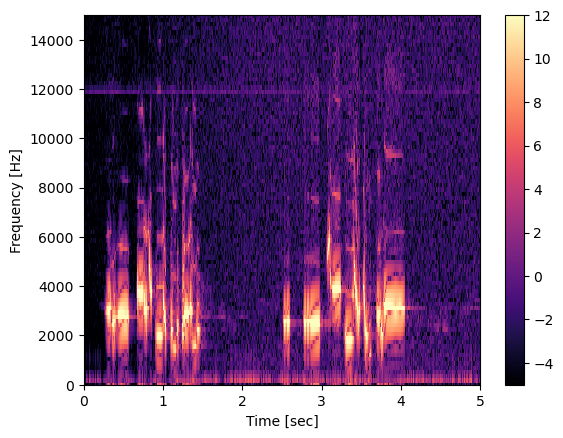

In [40]:
f, t, Sxx = signal.spectrogram(data, sample_rate)

# we can use a different colour map by setting cmap
# can choose the minimum and maximum by choosing vmin, vmax
plt.pcolormesh(t, f, np.log(Sxx), cmap = 'magma', vmin = -5, vmax = 12)

# we can choose to look only at a limited region
plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')

plt.ylim(0,15000)
plt.xlim(0,5)

plt.colorbar()

plt.show()

# Exercises

## Exercise 1 (2 marks)
Load the file './Jungle-SoundBible.com-1211567897.wav' you can disregard one of the channels.
Print the number of samples, the length of the file in seconds, and the sample rate.
Listen to the file and and plot the **time series**, **the spectrum**, and **the spectrogram**. 
Make sure that the axes are labeled in a sensible way.

In [2]:
# Please implement
#import libraries
import numpy as np
import scipy.io.wavfile as wav
import scipy.signal as signal 
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from IPython.display import Audio

#load the audio file 
file_path = "./Jungle-SoundBible.com-1211567897.wav"
sample_rate, data = wav.read(file_path)

# keep only one channel
if len(data.shape) > 1:
    data = data[:, 0] 

# Number of samples and length of the file
samples = len(data)
length = samples / sample_rate

# Print information
print(f"Number of samples: {samples}")
print(f"Sample rate: {sample_rate} Hz")
print(f"Length of audio: {length:.2f} seconds")


Number of samples: 119808
Sample rate: 22050 Hz
Length of audio: 5.43 seconds


In [4]:
# Play the audio
Audio(file_path)

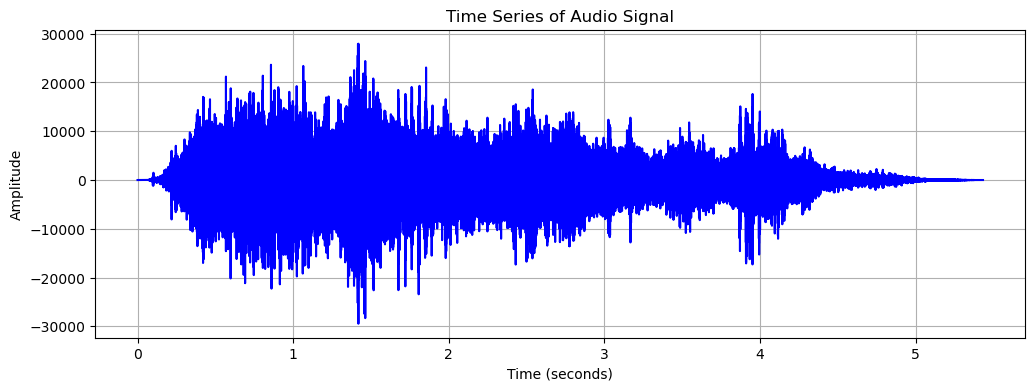

In [6]:
# time axis for plotting
axis = np.linspace(0, length, samples)

# plot the time series
plt.figure(figsize=(12, 4))
plt.plot(axis, data, color='blue')
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Time Series of Audio Signal")
plt.grid()
plt.show()

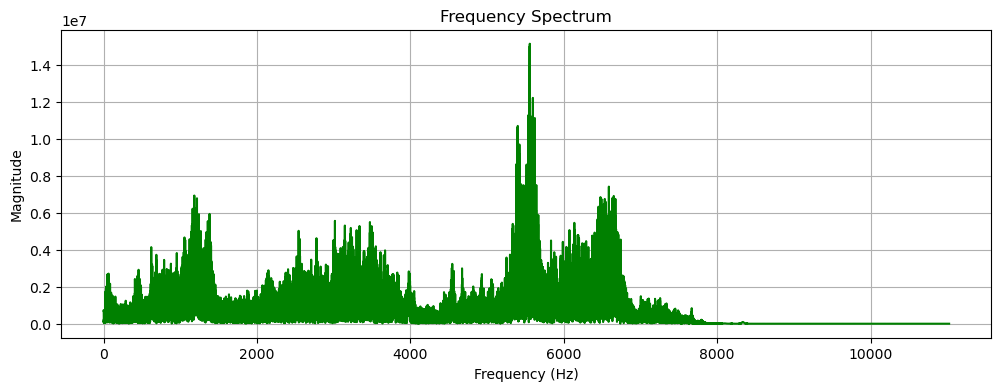

In [14]:
# plot the frequency spectrum
spectrum = np.abs(fft(data))
frequencies = np.fft.fftfreq(samples, d=1/sample_rate)

plt.figure(figsize=(12, 4))
plt.plot(frequencies[:samples // 2], spectrum[:samples // 2], color='green')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Spectrum")
plt.grid()
plt.show()

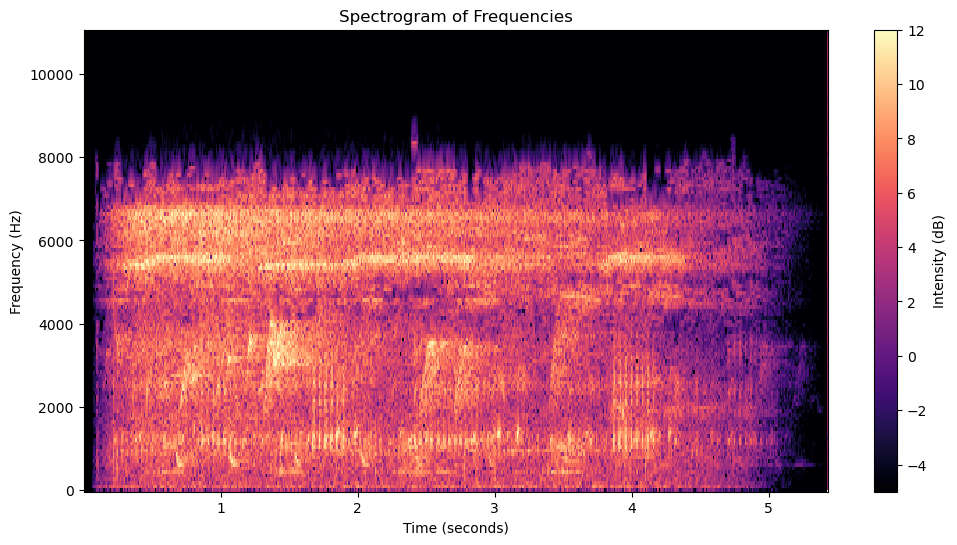

In [16]:
# plot the spectrogram
f, t, Sxx = signal.spectrogram(data, sample_rate)
plt.figure(figsize=(12, 6))
plt.specgram(data, Fs=sample_rate, cmap='inferno')
plt.pcolormesh(t, f, np.log(Sxx), cmap = 'magma', vmin = -5, vmax = 12)
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency (Hz)")
plt.title("Spectrogram of Frequencies")
plt.colorbar(label="Intensity (dB)")
plt.show()

## Exercise 2 (6 marks)
The audio file contains sounds produced by different animals.
Try to identify which parts of the spectrum belong to different animals.
Design 3 different filters that each isolate the sound produced by 3 types of animal.
Each filter should roughly conserve only the frequency range of one animal type and remove all other frequencies above and below that range.
It can help to use 'plt.xlim' and 'plt.ylim' to zoom in on different parts of the spectrogram and find the correct parts of the spectrum.
It can also be very useful to change 'vmin' and 'vmax' to find the animals.

After filtering the signal, listen to the results to make sure that you have roughly isolated the animal.
Finally, **make one spectrogram for each filtered signal**.


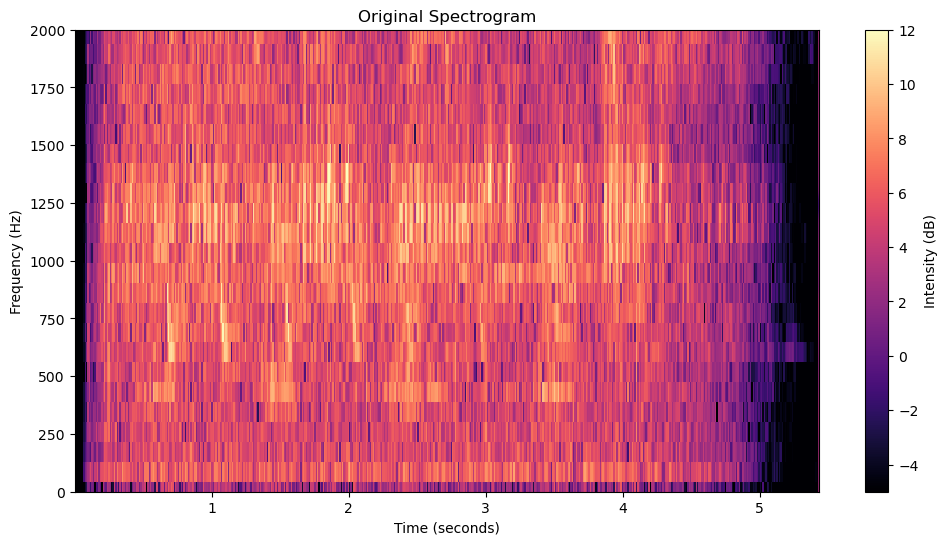

In [18]:
# Plot the spectrogram for the purpose of changing the y scale to zoom in and out and find the appropriate frequency ranges 
plt.figure(figsize=(12, 6))
plt.specgram(data, Fs=sample_rate, cmap='inferno')
plt.pcolormesh(t, f, np.log(Sxx), cmap = 'magma', vmin = -5, vmax = 12)
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency (Hz)")
plt.title("Original Spectrogram")
plt.colorbar(label="Intensity (dB)")
plt.ylim(0, 2000)  # Adjust this range to zoom in
plt.show()

In [20]:
# define a function to filter the frequencies
def bandpass_filter(audio_signal, lowcut, highcut, fs, order=6):
    nyquist = 0.5 * fs  # Nyquist frequency
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = signal.butter(order, [low, high], btype='band')  # create filter coefficients
    return signal.filtfilt(b, a, audio_signal)  # apply filter

# define ranges for different animals 
animal1 = (600, 800)   # range for first animal
animal2 = (1100, 1300) # range for second animal
animal3 = (5250, 5750) # range for third animal

# apply filters
animal1_sound = bandpass_filter(data, *animal1, sample_rate)
animal2_sound = bandpass_filter(data, *animal2, sample_rate)
animal3_sound = bandpass_filter(data, *animal3, sample_rate)

# Play the filtered sounds
print("Animal 1 Sound:")
Audio(animal1_sound, rate=sample_rate)

Animal 1 Sound:


In [22]:
print("Animal 2 Sound:")
Audio(animal2_sound, rate=sample_rate)

Animal 2 Sound:


In [24]:
print("Animal 3 Sound:")
Audio(animal3_sound, rate=sample_rate)

Animal 3 Sound:


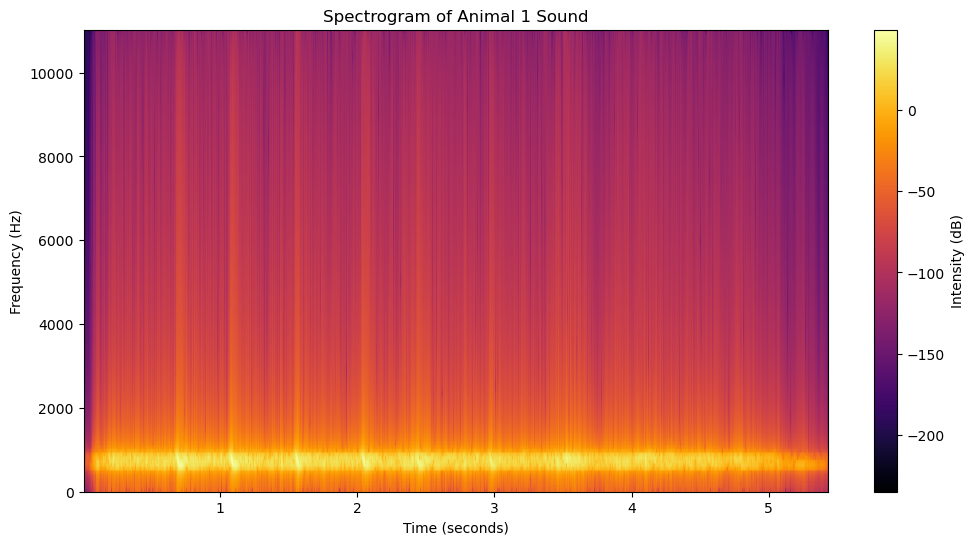

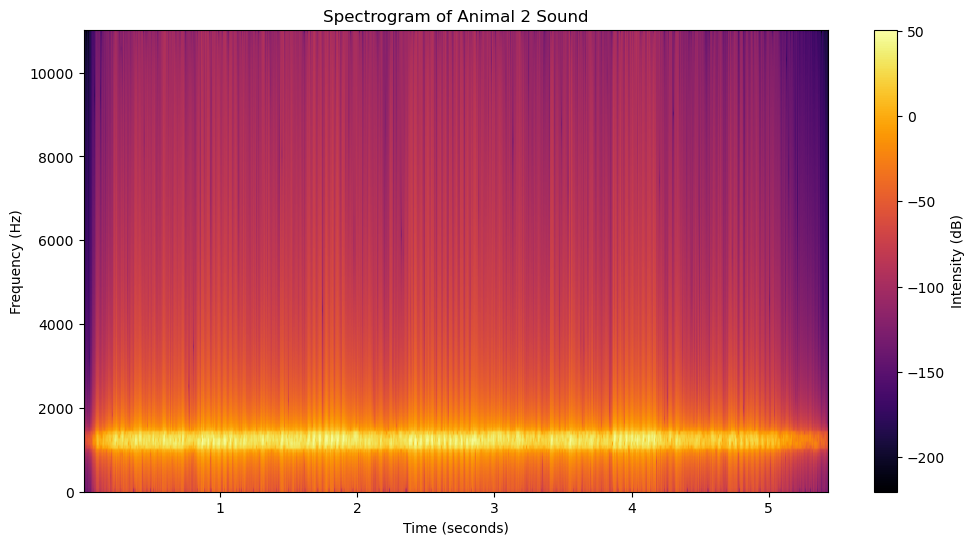

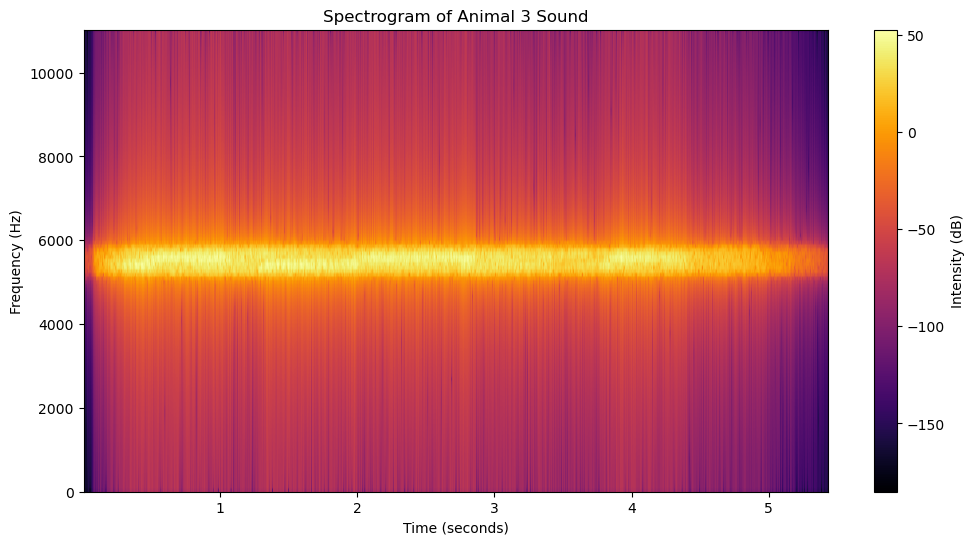

In [26]:
# Function to plot spectrogram
def plot_spectrogram(signal, title):
    plt.figure(figsize=(12, 6))
    plt.specgram(signal, Fs=sample_rate, cmap='inferno')
    plt.xlabel("Time (seconds)")
    plt.ylabel("Frequency (Hz)")
    plt.title(title)
    plt.colorbar(label="Intensity (dB)")
    plt.show()

# Plot spectrograms for each filtered signal
plot_spectrogram(animal1_sound, "Spectrogram of Animal 1 Sound")
plot_spectrogram(animal2_sound, "Spectrogram of Animal 2 Sound")
plot_spectrogram(animal3_sound, "Spectrogram of Animal 3 Sound")

## Exercise 3 (2 marks)
So far we have used only brick wall filters that set the weight to 0 and 1 for frequencies that should be removed or retained.
Use a convolution to create a filter for one of the animals that transitions more smoothly between areas of the spectrum that are removed and that are retained.
Plot the **filter weights** and make a **spectrogram after filtering**.

In [29]:
# define target frequency range 
lowcut = 300
highcut = 800

# create a filter to transition between frequencies
def gaussian_filter(size, sigma):
    x = np.linspace(-size // 2, size // 2, size)
    gauss = np.exp(-0.5 * (x / sigma) ** 2)
    return gauss / np.sum(gauss)  # Normalize

# define parameters
filter_size = 101  # Length of the filter
standdev = 15         # Standard deviation for smooth transition
gaussian = gaussian_filter(filter_size, standdev)

# apply filter to the audio signal for animal 2
filtered_signal = np.convolve(animal2_sound, gaussian, mode='same')

# play the filtered sound
print("Filtered Animal 2 Sound:")
Audio(filtered_signal, rate=sample_rate)



Filtered Animal 2 Sound:


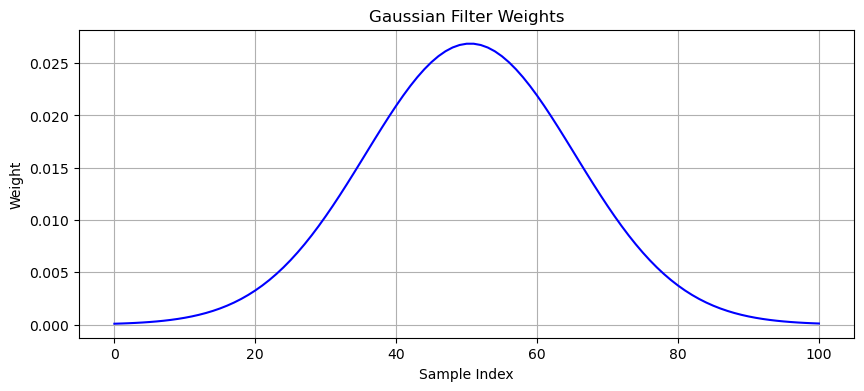

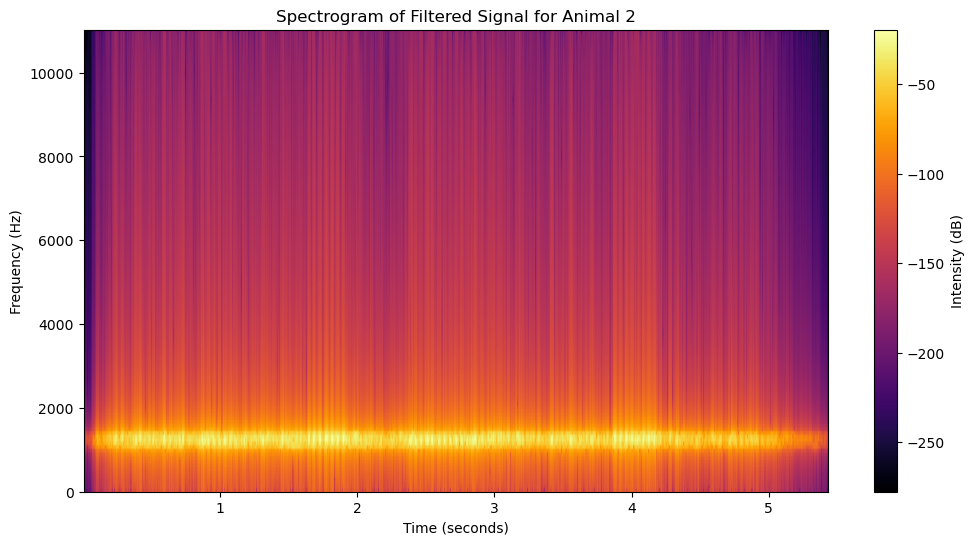

In [31]:
# plot the weights
plt.figure(figsize=(10, 4))
plt.plot(gaussian, color='blue')
plt.xlabel("Sample Index")
plt.ylabel("Weight")
plt.title("Gaussian Filter Weights")
plt.grid()
plt.show()

# plot the spectrogram of the filtered signal
plt.figure(figsize=(12, 6))
plt.specgram(filtered_signal, Fs=sample_rate, cmap='inferno')
#plt.pcolormesh(t, f, np.log(Sxx), cmap = 'magma', vmin = -5, vmax = 12)
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency (Hz)")
plt.title("Spectrogram of Filtered Signal for Animal 2")
plt.colorbar(label="Intensity (dB)")
plt.show()